In [1]:
import pandas as pd

# Read the larger dataset (100k records)
larger_df = pd.read_csv("Dataset.csv")

# Read the smaller dataset (5k records)
smaller_df = pd.read_csv("movie_metadata.csv")

# Concatenate the datasets vertically
merged_df = pd.concat([larger_df, smaller_df], ignore_index=True)

# Save the concatenated dataset to a new CSV file
merged_df.to_csv("concatenated_dataset.csv", index=False)


In [2]:
import pandas as pd

# Read the larger dataset (100k records)
larger_df = pd.read_csv("Dataset.csv")

# Read the smaller dataset (5k records)
smaller_df = pd.read_csv("movie_metadata.csv")

# Concatenate the datasets vertically
merged_df = pd.concat([larger_df, smaller_df], ignore_index=True)

# Data Preprocessing

# Handling Missing Values
num_replaced_nulls = merged_df.isnull().sum().sum()
merged_df.fillna(value=0, inplace=True)  # Replace missing values with 0

# Save the concatenated and preprocessed dataset to a new CSV file
preprocessed_filepath = "preprocessed_dataset.csv"
merged_df.to_csv(preprocessed_filepath, index=False)

print("Data preprocessing complete. Preprocessed dataset saved to:", preprocessed_filepath)
print("Total number of null values replaced:", num_replaced_nulls)


Data preprocessing complete. Preprocessed dataset saved to: preprocessed_dataset.csv
Total number of null values replaced: 2822954


Movie with the highest combined score:
Movie Title: Interstellar 
Combined Score: 349712.0


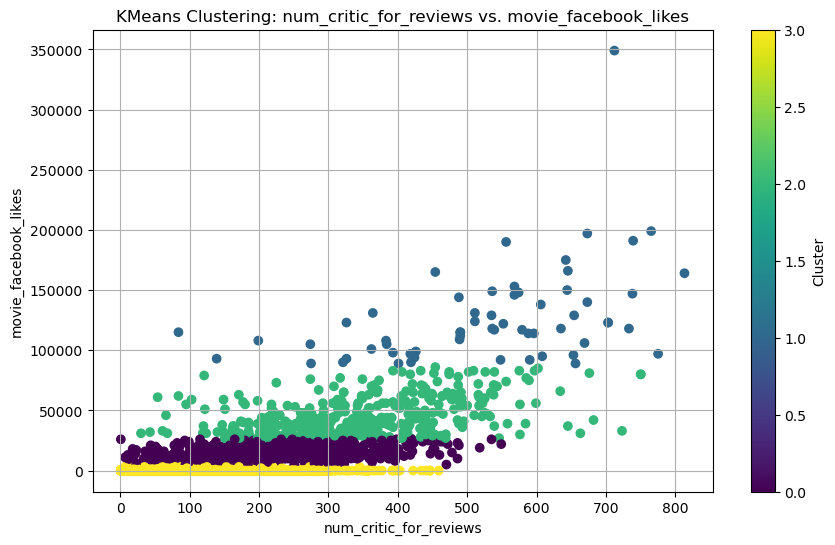

Statistical Report for Each Cluster:
+---------+--------+--------------------+--------------------+---------+----------+----------+----------+----------+
| cluster | count  |        mean        |        std         |   min   |   25%    |   50%    |   75%    |   max    |
+---------+--------+--------------------+--------------------+---------+----------+----------+----------+----------+
|    0    | 796.0  | 14942.777638190955 | 5481.4738452838355 | 4072.0  | 11148.75 | 14177.0  | 19107.5  | 26535.0  |
|    1    |  61.0  | 127641.72131147541 | 41009.48348822549  | 89275.0 | 99426.0  | 117579.0 | 144488.0 | 349712.0 |
|    2    | 388.0  | 45525.07474226804  | 15488.586405125036 | 27151.0 | 33154.0  | 40369.0  | 56309.5  | 86454.0  |
|    3    | 3748.0 | 348.0725720384205  | 465.69889460658067 |   1.0   |   93.0   |  168.0   |  421.25  |  3345.0  |
+---------+--------+--------------------+--------------------+---------+----------+----------+----------+----------+


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Load your data into merged_df
# merged_df = ...
# Read the larger dataset (100k records)
larger_df = pd.read_csv("Dataset.csv")

# Read the smaller dataset (5k records)
smaller_df = pd.read_csv("movie_metadata.csv")

# Concatenate the datasets vertically
merged_df = pd.concat([larger_df, smaller_df], ignore_index=True)

# Calculate a combined score based on num_critic_for_reviews and movie_facebook_likes
merged_df['combined_score'] = merged_df['num_critic_for_reviews'] + merged_df['movie_facebook_likes']

# Select features for clustering
features = merged_df[['num_critic_for_reviews', 'movie_facebook_likes', 'combined_score']]

# Preprocess data: Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(features)

# Perform KMeans clustering
num_clusters = 4  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)  # Set n_init explicitly
merged_df['cluster'] = kmeans.fit_predict(imputed_features)


# Find the movie with the highest combined_score
max_combined_score = merged_df['combined_score'].max()
max_combined_movie = merged_df[merged_df['combined_score'] == max_combined_score]['movie_title'].iloc[0]

# Print the movie with the highest combined_score
print("Movie with the highest combined score:")
print("Movie Title:", max_combined_movie)
print("Combined Score:", max_combined_score)

# Plot the scatter plot with cluster color coding
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['num_critic_for_reviews'], merged_df['movie_facebook_likes'], c=merged_df['cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('num_critic_for_reviews')
plt.ylabel('movie_facebook_likes')
plt.title('KMeans Clustering: num_critic_for_reviews vs. movie_facebook_likes')
plt.grid(True)
plt.show()
# Generate a statistical report for each cluster
cluster_report = merged_df.groupby('cluster')['combined_score'].describe()

# Print the statistical report in a table format using tabulate
print("Statistical Report for Each Cluster:")
print(tabulate(cluster_report, headers='keys', tablefmt='pretty'))


In [7]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from tabulate import tabulate

# Read the larger dataset (100k records)
larger_df = pd.read_csv("Dataset.csv")

# Read the smaller dataset (5k records)
smaller_df = pd.read_csv("movie_metadata.csv")

# Concatenate the datasets vertically
merged_df = pd.concat([larger_df, smaller_df], ignore_index=True)

# Data Preprocessing

# Handling Missing Values
merged_df.fillna(value="", inplace=True)  

# Combine genres and movie_title columns into a single string column
merged_df['genres_movie_title'] = merged_df['genres'] + "|" + merged_df['movie_title']

# Apriori Algorithm

# Convert categorical variables to boolean format
encoded_df = pd.get_dummies(merged_df, columns=['genres_movie_title'])
bool_encoded_df = encoded_df.astype(bool)

# Find frequent itemsets with Apriori
frequent_itemsets = apriori(bool_encoded_df, min_support=0.1, use_colnames=True)

# Find association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("Total Number of Frequent Itemsets:", frequent_itemsets.shape[0])
# Display frequent itemsets and association rules in a tabular format
print("Frequent Itemsets:\n")
print(tabulate(frequent_itemsets, headers="keys", tablefmt="pretty"))

#print("\nAssociation Rules:\n")
print("\nAssociation Rules:\n", rules)


# Save the preprocessed dataset to a new CSV file
preprocessed_filepath = "preprocessed_dataset.csv"
bool_encoded_df.to_csv(preprocessed_filepath, index=False)

print("Data preprocessing and Apriori analysis complete. Preprocessed dataset saved to:", preprocessed_filepath)


Total Number of Frequent Itemsets: 31
Frequent Itemsets:

+----+--------------------+----------------------------------------------------------------------------------+
|    |      support       |                                     itemsets                                     |
+----+--------------------+----------------------------------------------------------------------------------+
| 0  | 0.951963901528854  |                              frozenset({'user_id'})                              |
| 1  | 0.9519924604458999 |                              frozenset({'item_id'})                              |
| 2  | 0.9519924604458999 |                              frozenset({'rating'})                               |
| 3  | 0.9519924604458999 |                             frozenset({'timestamp'})                             |
| 4  | 0.9519924604458999 |                       frozenset({'genres_movie_title_|'})                        |
| 5  | 0.951963901528854  |                        fro

Number of Detected Outliers: 4965
Percentage of Outliers: 4.72650077109076 %
Outlier detection and flagging complete. Outlier-flagged dataset saved to: outlier_flagged_dataset.csv


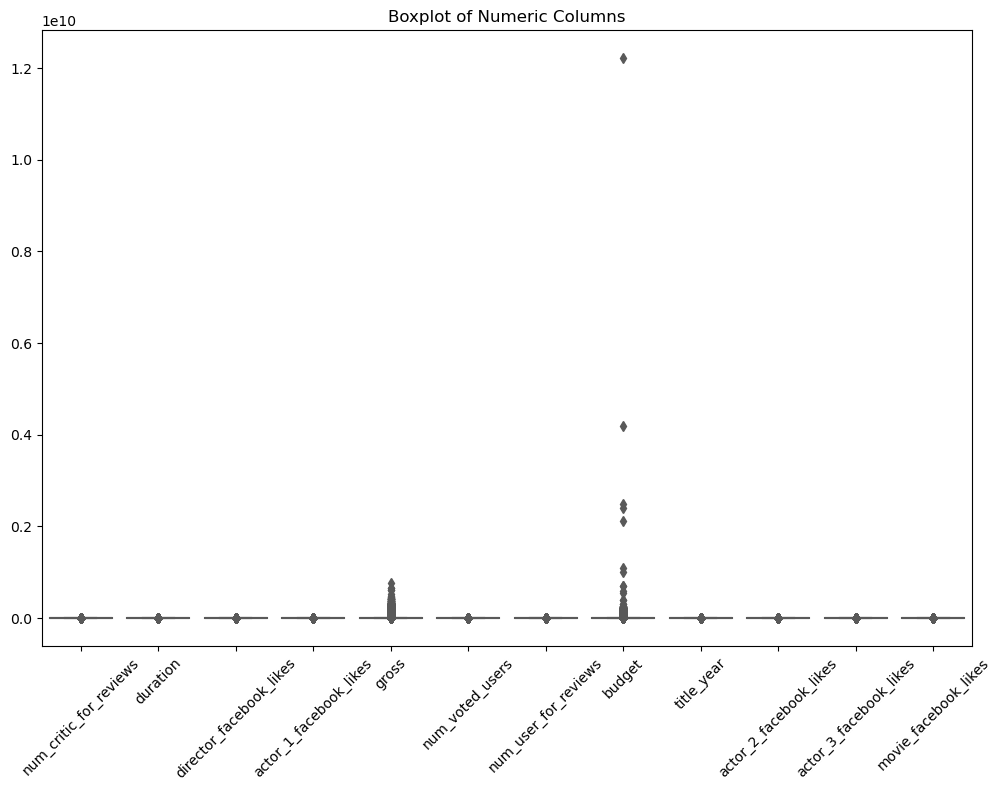

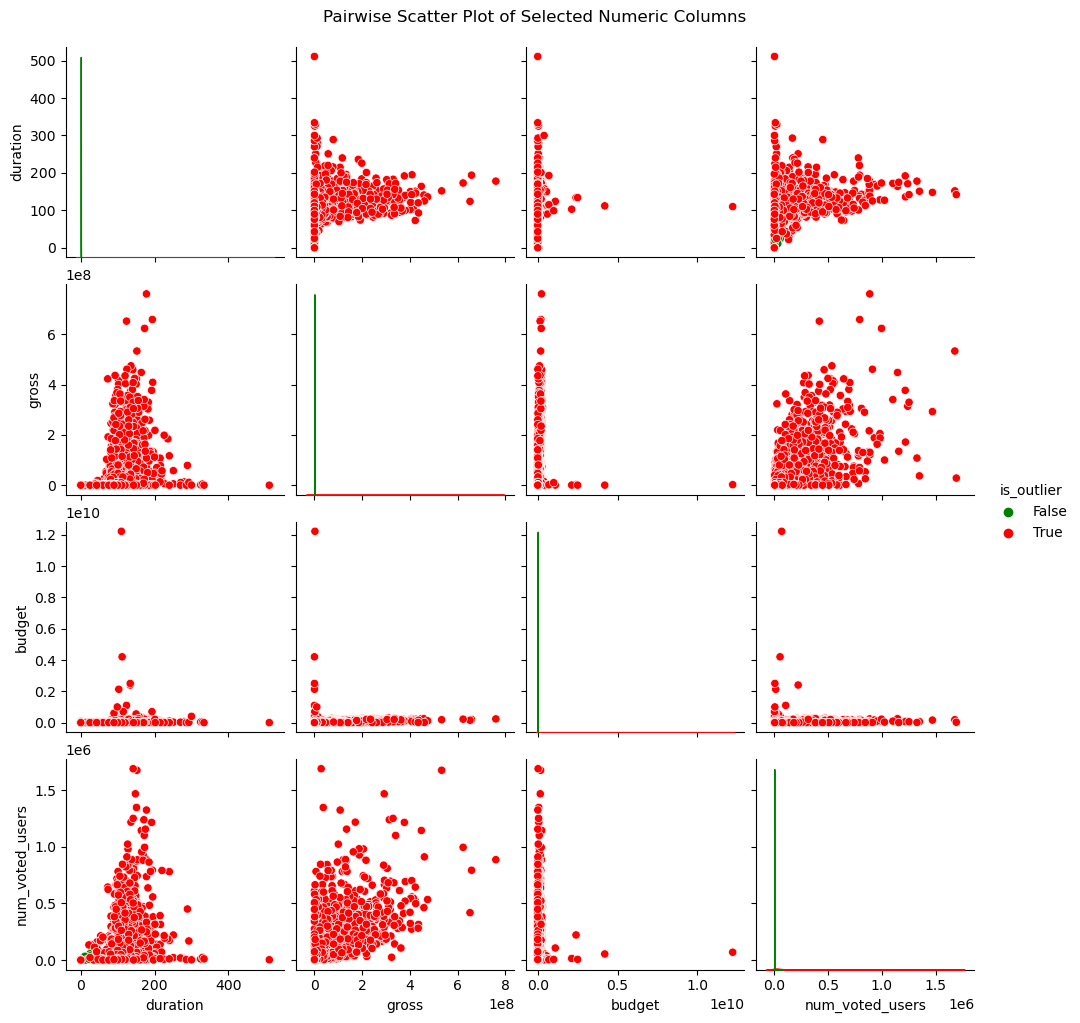

Detailed Statistical Report:
          num_critic_for_reviews       duration  director_facebook_likes  \
count              105046.000000  105046.000000            105046.000000   
mean                    6.663652       5.131152                32.277945   
std                    39.906435      23.539868               627.041117   
min                     0.000000       0.000000                 0.000000   
25%                     0.000000       0.000000                 0.000000   
50%                     0.000000       0.000000                 0.000000   
75%                     0.000000       0.000000                 0.000000   
max                   813.000000     511.000000             23000.000000   
skewness                8.244223       4.742861                25.210464   
kurtosis               84.094890      24.093613               671.592205   

          actor_1_facebook_likes         gross  num_voted_users  \
count              105046.000000  1.050460e+05     1.050460e+05   


In [10]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# Read the larger dataset (100k records)
larger_df = pd.read_csv("Dataset.csv")

# Read the smaller dataset (5k records)
smaller_df = pd.read_csv("movie_metadata.csv")

# Concatenate the datasets vertically
merged_df = pd.concat([larger_df, smaller_df], ignore_index=True)

# Data Preprocessing

# Handling Missing Values
merged_df.fillna(value=0, inplace=True)  

# Numeric columns for outlier detection
numeric_columns = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'movie_facebook_likes']

# Apply Z-Score outlier detection
z_scores = np.abs(zscore(merged_df[numeric_columns]))
outliers = (z_scores > 3).any(axis=1)  # Set a threshold of 3 for detecting outliers

# Print the number of detected outliers
num_detected_outliers = sum(outliers)
print("Number of Detected Outliers:", num_detected_outliers)
print("Percentage of Outliers:", (num_detected_outliers / merged_df.shape[0]) * 100, "%")

# Save the dataset with outlier flags to a new CSV file
outlier_flagged_filepath = "outlier_flagged_dataset.csv"
merged_df['is_outlier'] = outliers
merged_df.to_csv(outlier_flagged_filepath, index=False)

print("Outlier detection and flagging complete. Outlier-flagged dataset saved to:", outlier_flagged_filepath)

# Statistical Summary Visualization (Boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df[numeric_columns], palette="Set2")
plt.title("Boxplot of Numeric Columns")
plt.xticks(rotation=45)
plt.show()

# Pairwise scatter plot for selected numeric columns
pairwise_cols = ['duration', 'gross', 'budget', 'num_voted_users']
pairwise_plot = sns.pairplot(merged_df, vars=pairwise_cols, hue='is_outlier', diag_kind='kde', palette={True: 'red', False: 'green'})
pairwise_plot.fig.suptitle("Pairwise Scatter Plot of Selected Numeric Columns", y=1.02)
plt.show()
# Generate a detailed statistical report
statistical_report = merged_df[numeric_columns].describe()

# Calculate skewness and kurtosis
skewness = merged_df[numeric_columns].skew()
kurtosis = merged_df[numeric_columns].kurtosis()

# Add skewness and kurtosis to the report
statistical_report.loc['skewness'] = skewness
statistical_report.loc['kurtosis'] = kurtosis

# Print the statistical report
print("Detailed Statistical Report:")
print(statistical_report)

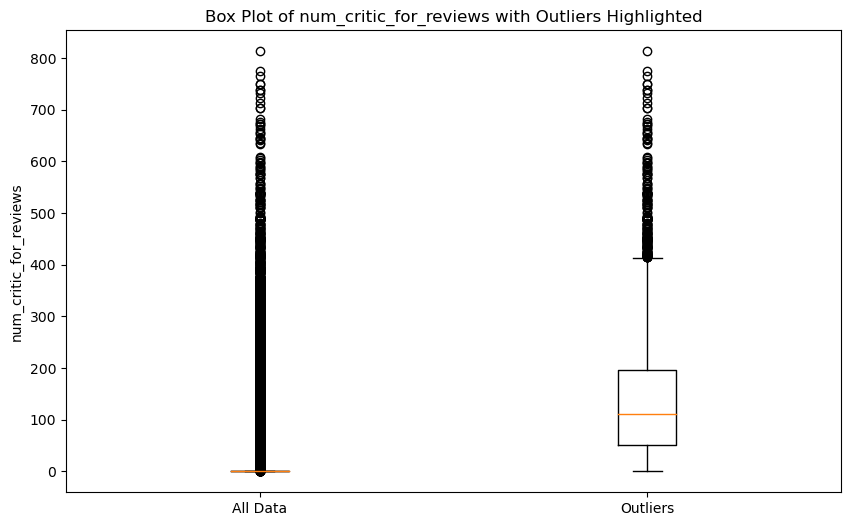

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
# Draw a box plot for a specific numeric column with outliers highlighted
selected_column = 'num_critic_for_reviews'  
plt.figure(figsize=(10, 6))
plt.boxplot([merged_df[selected_column], merged_df[selected_column][outliers]], labels=['All Data', 'Outliers'])
plt.title(f"Box Plot of {selected_column} with Outliers Highlighted")
plt.ylabel(selected_column)
plt.show()


| Metric              |       Value |
|:--------------------|------------:|
| Mean Absolute Error | 2.16564e+06 |
| Mean Squared Error  | 3.06511e+14 |
| R-squared           | 0.128432    |


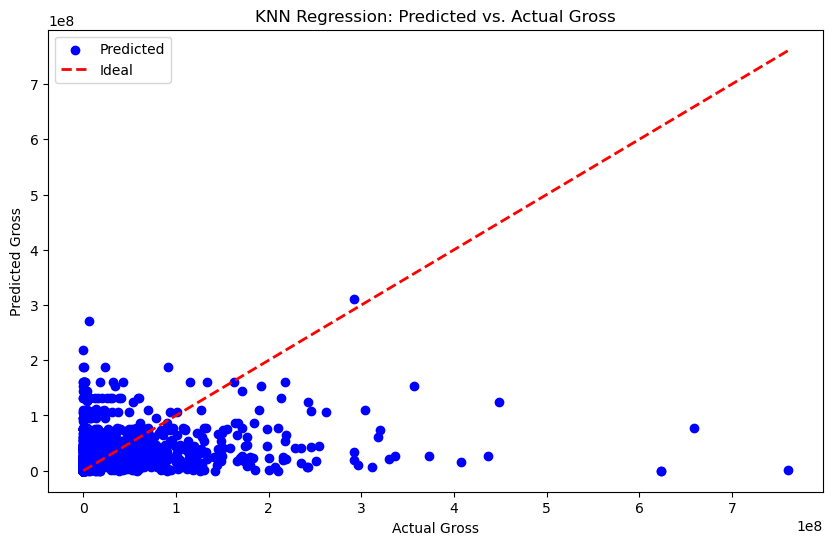

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate

# Select numeric columns for regression
numeric_columns = ['imdb_score', 'aspect_ratio']

# Features for regression
X = merged_df[numeric_columns]
y = merged_df['gross']  # Replace with your target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate KNN regressor and fit to training data
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

# Predict on test data
y_pred = knn_regressor.predict(X_test)

# Calculate regression evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the tabulated output
print(tabulate([["Mean Absolute Error", mae],
                ["Mean Squared Error", mse],
                ["R-squared", r2]],
               headers=["Metric", "Value"], tablefmt="pipe"))

# Visualize the regression predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
plt.title('KNN Regression: Predicted vs. Actual Gross')
plt.legend()
plt.show()


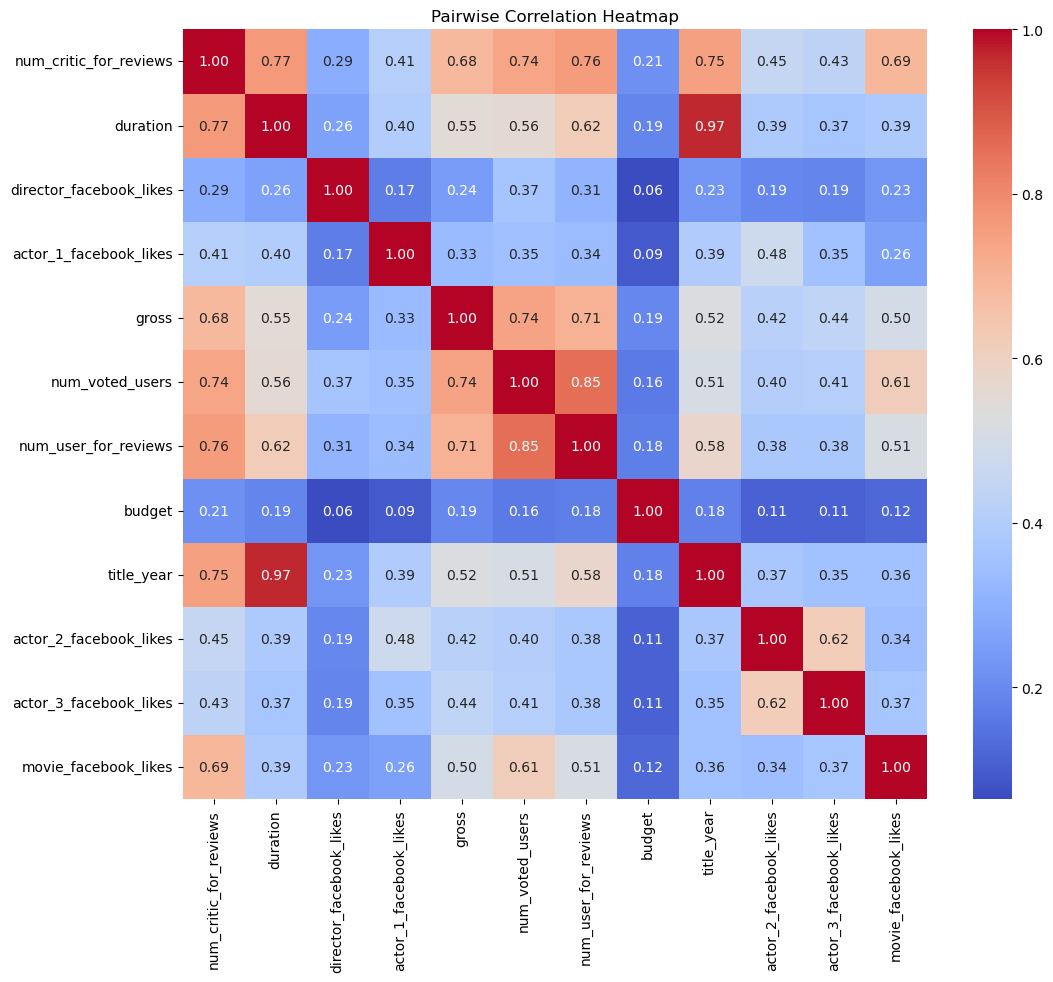

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select numeric columns for correlation heatmap
numeric_columns = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'movie_facebook_likes']

# Calculate pairwise correlations
correlation_matrix = merged_df[numeric_columns].corr()

# Create a heatmap plot for correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Heatmap')
plt.show()
